# Lab 4

## Artyom Iudin BVT2101

<div class="alert alert-block alert-info">
<b>Chapter navigation</b> isn't working on github. Download .ipynb to use it.

If it is still not working close tab with notebook and open it again.
</div>

# Chapters <a class="anchor" id="chapters"></a>
0. [Import](#import)
1. [Preprocessing](#preprocessing)
      1. [Create train_df](#train_df)
      2. [Create test_df](#test_df)
      3. [DataFrame shape](#shape)
      4. [Null values](#null)
      5. [Age values](#age)
      6. [Cabin values](#cabin)
      7. [Embarked values](#embarked)
      8. [Filling values](#filling)
      9. [Any null values?](#no_null)
      10. [Is anyone single?](#single)
      11. [Dummies](#dummies)
      12. [Test DataFrame preprocessing](#test_df_preprocessing)
      13. [Young people chances](#young)
      14. [Young people column](#is_minor)
      15. [Safest class](#safest)
      16. [Single chances](#single_chances)
2. [Selection](#selection)
3. [Train Logistic Regression](#train)
4. [K-Fold cross_val_score](#k_fold)
5. [K-Fold cross_validate](#k_fold_val)
6. [Naive Bayes](#bayes)
7. [Support Vector Machine](#svm)

# 0. [Import](#chapters) <a class="anchor" id="import"></a>

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

import warnings

warnings.filterwarnings('ignore')

# 1. [Preprocessing](#chapters) <a class="anchor" id="preprocessing"></a>

## 1.1 [Create train_df](#chapters) <a class="anchor" id="train_df"></a>

In [91]:
train_df = pd.read_csv('../datasets/titanic_train.csv')
train_df_original = pd.read_csv('../datasets/titanic_train.csv')
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C
562,563,0,2,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.5000,NaN,S
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q
528,529,0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S


## 1.2 [Create test_df](#chapters) <a class="anchor" id="test_df"></a>

In [92]:
test_df = pd.read_csv('../datasets/titanic_test.csv')
test_df.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.0000,NaN,S
171,1063,3,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C
273,1165,3,"Lennon, Miss. Mary",female,NaN,1,0,370371,15.5000,NaN,Q
259,1151,3,"Midtsjo, Mr. Karl Albert",male,21.00,0,0,345501,7.7750,NaN,S
78,970,2,"Aldworth, Mr. Charles Augustus",male,30.00,0,0,248744,13.0000,NaN,S
377,1269,2,"Cotterill, Mr. Henry Harry""""",male,21.00,0,0,29107,11.5000,NaN,S
265,1157,3,"Lyntakoff, Mr. Stanko",male,NaN,0,0,349235,7.8958,NaN,S
148,1040,1,"Crafton, Mr. John Bertram",male,NaN,0,0,113791,26.5500,NaN,S
158,1050,1,"Borebank, Mr. John James",male,42.00,0,0,110489,26.5500,D22,S
354,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S


## 1.3 [DataFrame shape](#chapters) <a class="anchor' id='shape"></a>

In [93]:
print(f"There is {train_df.shape[0]} rows and {train_df.shape[1]} columns with\
 {train_df.shape[0] * train_df.shape[1]} elements in total in train_df")

There is 891 rows and 12 columns with 10692 elements in total in train_df


In [94]:
print(f"There is {test_df.shape[0]} rows and {test_df.shape[1]} columns with\
 {test_df.shape[0] * test_df.shape[1]} elements in total in test_df")

There is 418 rows and 11 columns with 4598 elements in total in test_df


## 1.4 [Null values](#chapters) <a class="anchor" id="null"></a>

In [95]:
if any(train_df.isnull().sum()):
    print(train_df.isnull().sum())
else:
    print("No null values")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 1.5 [Age values](#chapters) <a class="anchor" id="age"></a>

19.87 % missed values in Age
Age median is equal to 28.0, mean is equal to 29.70


<Axes: >

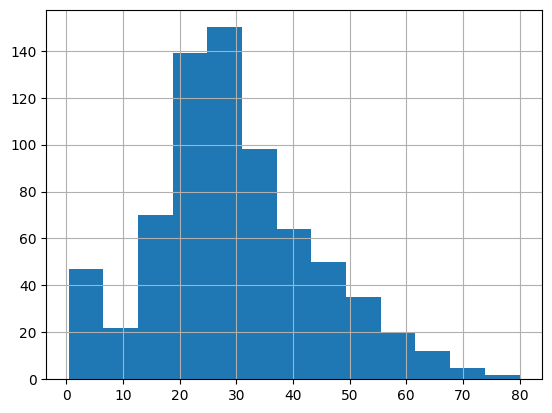

In [96]:
print(f"{(train_df.isnull().sum().loc['Age'] / train_df.shape[0]) * 100:.2f} % missed\
 values in Age")

print(f"Age median is equal to {train_df.Age.median()}, mean is equal to {train_df.Age.mean():.2f}")

train_df.Age.hist(bins=13)

## 1.6 [Cabin values](#chapters) <a class="anchor" id="cabin"></a>

In [97]:
print(f"{(train_df.isnull().sum().loc['Cabin'] / train_df.shape[0]) * 100:.2f} % missed\
 values in Cabin")

77.10 % missed values in Cabin


## 1.7 [Embarked values](#chapters) <a class="anchor" id="embarked"></a>

In [98]:
print(f"{(train_df.isnull().sum().loc['Embarked'] / train_df.shape[0]) * 100:.2f} % missed\
 values in Embarked")

0.22 % missed values in Embarked


## 1.8 [Filling null values](#chapters) <a class="anchor" id="filling"></a>

In [99]:
train_df.fillna({'Age':train_df.Age.mean(), 'Embarked':train_df.Embarked.mode().values[0]}, inplace=True)
train_df.drop('Cabin', axis='columns', inplace=True)

## 1.9 [Any null values?](#chapters) <a class="anchor" id="no_null"></a>

In [100]:
if any(train_df.isnull().sum()):
    print(train_df.isnull().sum())
else:
    print("No null values")

No null values


## 1.10 [Is anyone single?](#chapters) <a class="anchor" id="single"></a>

In [101]:
train_df['Single'] = ((train_df['SibSp'] > 0) | (train_df['Parch'] > 0)).astype(np.uint8)
train_df.drop(['SibSp', 'Parch'], axis='columns', inplace=True)
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Single
568,569,0,3,"Doharr, Mr. Tannous",male,29.699118,2686,7.2292,C,0
461,462,0,3,"Morley, Mr. William",male,34.000000,364506,8.0500,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,C,1
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,PC 17558,247.5208,C,1
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.000000,13214,30.5000,C,0
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.000000,PC 17590,50.4958,S,0
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.000000,34218,10.5000,S,0
154,155,0,3,"Olsen, Mr. Ole Martin",male,29.699118,Fa 265302,7.3125,S,0
622,623,1,3,"Nakid, Mr. Sahid",male,20.000000,2653,15.7417,C,1
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.000000,PC 17477,69.3000,C,0


## 1.11 [Dummies](#chapters) <a class="anchor" id="dummies"></a>

In [102]:
train_df = pd.get_dummies(train_df, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True, dtype=np.uint8)
train_df.sample(10)

,PassengerId,Survived,Name,Age,Ticket,Fare,Single,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
49,50,0,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",18.0,349237,17.8000,1,0,1,0,0,1
433,434,0,"Kallio, Mr. Nikolai Erland",17.0,STON/O 2. 3101274,7.1250,0,0,1,1,0,1
414,415,1,"Sundman, Mr. Johan Julian",44.0,STON/O 2. 3101269,7.9250,0,0,1,1,0,1
27,28,0,"Fortune, Mr. Charles Alexander",19.0,19950,263.0000,1,0,0,1,0,1
291,292,1,"Bishop, Mrs. Dickinson H (Helen Walton)",19.0,11967,91.0792,1,0,0,0,0,0
200,201,0,"Vande Walle, Mr. Nestor Cyriel",28.0,345770,9.5000,0,0,1,1,0,1
542,543,0,"Andersson, Miss. Sigrid Elisabeth",11.0,347082,31.2750,1,0,1,0,0,1
382,383,0,"Tikkanen, Mr. Juho",32.0,STON/O 2. 3101293,7.9250,0,0,1,1,0,1
858,859,1,"Baclini, Mrs. Solomon (Latifa Qurban)",24.0,2666,19.2583,1,0,1,0,0,0
85,86,1,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",33.0,3101278,15.8500,1,0,1,0,0,1


## 1.12 [Test DataFrame preprocessing](#chapters) <a class="anchor" id="test_df_preprocessing"></a>

In [103]:
test_df.fillna({'Age':28, 'Fare':14.45}, inplace=True)
test_df.drop('Cabin', axis='columns', inplace=True)

test_df['Single'] = ((test_df['SibSp'] > 0) | (test_df['Parch'] > 0)).astype(np.uint8)
test_df.drop(['SibSp', 'Parch'], axis='columns', inplace=True)

test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True, dtype=np.uint8)

test_df.sample(10)

,PassengerId,Name,Age,Ticket,Fare,Single,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
167,1059,"Ford, Mr. Edward Watson",18.0,W./C. 6608,34.3750,1,1,0,1,0,1
57,949,"Abelseth, Mr. Olaus Jorgensen",25.0,348122,7.6500,0,1,0,1,0,1
157,1049,"Lundin, Miss. Olga Elida",23.0,347469,7.8542,0,0,0,1,0,1
245,1137,"Kenyon, Mr. Frederick R",41.0,17464,51.8625,1,1,0,1,0,0
90,982,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",22.0,347072,13.9000,1,0,0,1,0,1
345,1237,"Abelseth, Miss. Karen Marie",16.0,348125,7.6500,0,0,0,1,0,1
243,1135,"Hyman, Mr. Abraham",28.0,3470,7.8875,0,1,0,1,0,1
181,1073,"Compton, Mr. Alexander Taylor Jr",37.0,PC 17756,83.1583,1,1,0,0,0,0
33,925,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",28.0,W./C. 6607,23.4500,1,0,0,1,0,1
358,1250,"O'Keefe, Mr. Patrick",28.0,368402,7.7500,0,1,1,0,0,1


## 1.13 [Young people chances](#chapters) <a class="anchor" id="young"></a>

In [104]:
print(f"Chances to surivive to 16 yeats old is equal to\
 {len(train_df[(train_df['Age'] < 16) & (train_df['Survived'] == 1)]) / len(train_df):.2f}\
 among all and\
 {len(train_df[(train_df['Age']<16)&(train_df['Survived']==1)]) / len(train_df[train_df['Survived']==1]):.2f}\
 among survived")

Chances to surivive to 16 yeats old is equal to 0.05 among all and 0.14 among survived


## 1.14 [Young people column](#chapters) <a class="anchor" id="is_minor"></a>

In [105]:
train_df['IsMinor'] = (train_df['Age'] < 16).astype(np.uint8)
train_df.sample(10)

,PassengerId,Survived,Name,Age,Ticket,Fare,Single,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,IsMinor
547,548,1,"Padro y Manent, Mr. Julian",29.699118,SC/PARIS 2146,13.8625,0,1,0,1,0,0,0
758,759,0,"Theobald, Mr. Thomas Leonard",34.000000,363294,8.0500,0,0,1,1,0,1,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,W./C. 6607,23.4500,1,0,1,0,0,1,0
345,346,1,"Brown, Miss. Amelia ""Mildred""",24.000000,248733,13.0000,0,1,0,0,0,1,0
812,813,0,"Slemen, Mr. Richard James",35.000000,28206,10.5000,0,1,0,1,0,1,0
40,41,0,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",40.000000,7546,9.4750,1,0,1,0,0,1,0
435,436,1,"Carter, Miss. Lucile Polk",14.000000,113760,120.0000,1,0,0,0,0,1,1
417,418,1,"Silven, Miss. Lyyli Karoliina",18.000000,250652,13.0000,1,1,0,0,0,1,0
591,592,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",52.000000,36947,78.2667,1,0,0,0,0,0,0
385,386,0,"Davies, Mr. Charles Henry",18.000000,S.O.C. 14879,73.5000,0,1,0,1,0,1,0


## 1.15 [Safest class](#chapters) <a class="anchor" id="safest"></a>

In [106]:
print(f"Most safe class is\
 {np.argmax(pd.crosstab(train_df_original.Pclass, train_df_original.Survived)[1])+1}")
pd.crosstab(train_df_original.Pclass, train_df_original.Survived)

Most safe class is 1


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


## 1.16 [Single chances](#chapters) <a class="anchor" id="single_chances"></a>

In [107]:
if (train_df.groupby('Survived').Single.mean()[1] > 0.5):
    print('People with family had more chances to survive')
else:
    print('Single people with family had more chances to survive')

People with family had more chances to survive


# 2. [Selection](#chapters) <a class="anchor" id="selection"></a>

Selected features: ['Age', 'Single', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'IsMinor']


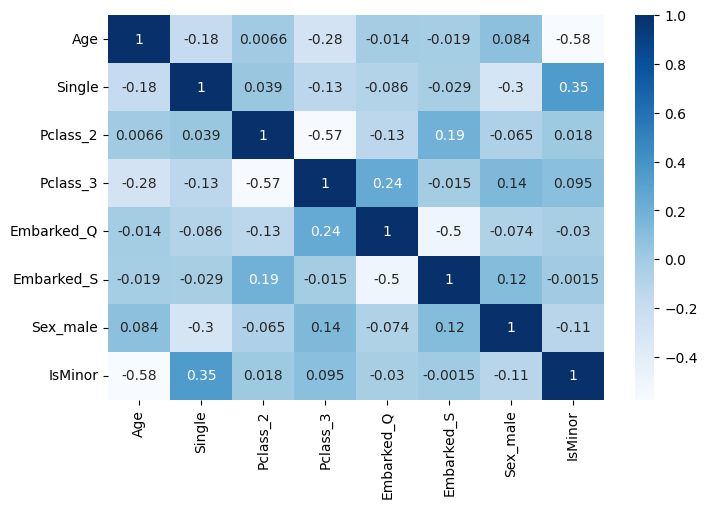

In [108]:
cols = ['Age','Fare','Single','Pclass_2','Pclass_3','Embarked_Q','Embarked_S','Sex_male','IsMinor'] 
X = train_df[cols]
y = train_df['Survived']

model = LogisticRegression()

rfe = RFE(model, n_features_to_select=8)
rfe = rfe.fit(X, y)

selected_features = X.columns[rfe.support_].to_list()
print(f"Selected features: {selected_features}")

X = train_df[selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap='Blues')
plt.show()

# 3. [Train Logistic Regression](#chapters) <a class="anchor" id="train"></a>

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thr = roc_curve(y_test, y_pred_proba)

print("Train/Test split results")
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(model.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))


Train/Test split results
LogisticRegression accuracy is 0.799
LogisticRegression log_loss is 0.433
LogisticRegression auc is 0.872


# 4. [K-Fold cross_val_score](#chapters) <a class="anchor" id="k_fold"></a>

In [110]:
scores_accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(model, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc')

print('K-fold cross-validation results:')
print(model.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(model.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(model.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.809
LogisticRegression average log_loss is 0.454
LogisticRegression average auc is 0.851


# 5. [K-Fold cross_validate](#chapters) <a class="anchor" id="k_fold_val"></a>

In [111]:
scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

model = LogisticRegression()

results = cross_validate(model, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(model.__class__.__name__+" average %s: %.3f (+/-%.3f)\
          " % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
            if list(scoring.values())[sc]=='neg_log_loss' 
            else results['test_%s' % list(scoring.values())[sc]].mean(), 
            results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.809 (+/-0.028)          
LogisticRegression average log_loss: 0.454 (+/-0.040)          
LogisticRegression average auc: 0.851 (+/-0.030)          


# 6. [Naive Bayes](#chapters) <a class="anchor" id="bayes"></a>

In [112]:
model = GaussianNB()
model.fit(X_train, y_train)

def cross_validate_scratch(model, train: tuple[pd.DataFrame, pd.Series], test: tuple[pd.DataFrame, pd.Series]) -> None:
    X_train = train[0]
    y_train = train[1]
    X_test = test[0]
    y_test = test[1]
    train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(train_predictions, y_train)
    train_recall = recall_score(train_predictions, y_train)
    train_precision = precision_score(train_predictions, y_train)

    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(test_predictions, y_test)
    test_recall = recall_score(test_predictions, y_test)
    test_precision = precision_score(test_predictions, y_test)

    print('Model metrics')
    print('Accuracy  Train: %.2f, Validation: %.2f' % (train_accuracy, test_accuracy))
    print('Recall    Train: %.2f, Validation: %.2f' % (train_recall, test_recall))
    print('Precision Train: %.2f, Validation: %.2f' % (train_precision, test_precision))
    
cross_validate_scratch(model, (X_train, y_train), (X_test, y_test))

Model metrics
Accuracy  Train: 0.79, Validation: 0.79
Recall    Train: 0.71, Validation: 0.75
Precision Train: 0.72, Validation: 0.74


# 7. [Support Vector Machine](#chapters) <a class="anchor" id="svm"></a>

In [115]:
model = SVC()
model.fit(X_train, y_train)

print(f"Default score is {model.score(X_test, y_test):.4f}")

selected_fields = ['Sex_male', 'Age', 'Pclass_2', 'Pclass_3']
X_train_selected = X_train[selected_fields]
X_test_selected = X_test[selected_fields]

model = SVC()
model.fit(X_train_selected, y_train)

print(f"Selected score is {model.score(X_test_selected, y_test):.4f}")

Default score is 0.6089
Selected score is 0.6089
